<h1>1. Introduction</h1>

- Purpose: This project's purpose is analyzing data about patients satisfaction, to find out if there were key features that would have positive effects on hospital overall ratings.

- Questions:
    1. Does hospital overall rating depend on any feature such as location, service quality and hospital type
    2. What are the features that would likely to improve patients satisfaction?
    3. If only a few changes can be made due to limited budget, what should be changed first?
    
    
- Data source: https://www.kaggle.com/datasets/kaggleprollc/healthcare-patient-satisfaction-data-collection

- Data source's description: In the U.S., every hospital that receives payments from Medicare and Medicaid is mandated to provide quality data to The Centers for Medicare and Medicaid Services (CMS) annually. This data helps gauge patient satisfaction levels across the country. While overall hospital scores can be influenced by the quality of customer services, there may also be variations in satisfaction based on the type of hospital or its location.


<h1>2. Data Loading and Cleaning:</h1>

In [508]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [509]:
# data loading
df = pd.read_csv('cms_hospital_patient_satisfaction_2020.csv', low_memory=False)

In [510]:
# see first five records
df.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN


In [511]:
# show data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442587 entries, 0 to 442586
Data columns (total 43 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   Facility ID                                                    442587 non-null  object 
 1   Facility Name                                                  442587 non-null  object 
 2   Address                                                        442587 non-null  object 
 3   City                                                           442587 non-null  object 
 4   State                                                          442587 non-null  object 
 5   ZIP Code                                                       442587 non-null  int64  
 6   County Name                                                    442587 non-null  object 
 7   Phone Number                                   

In [512]:
# show data types of all columns
df.dtypes

Facility ID                                                       object
Facility Name                                                     object
Address                                                           object
City                                                              object
State                                                             object
ZIP Code                                                           int64
County Name                                                       object
Phone Number                                                      object
HCAHPS Measure ID                                                 object
HCAHPS Question                                                   object
HCAHPS Answer Description                                         object
Patient Survey Star Rating                                        object
Patient Survey Star Rating Footnote                              float64
HCAHPS Answer Percent                              

In [513]:
# is data categorical or numerical?
print(df['Timeliness of care national comparison'].unique())
print(df['Efficient use of medical imaging national comparison'].unique())
print(df['Effectiveness of care national comparison'].unique())
print(df['Hospital Type'].unique())

# check Hospital overall rating data
df['Hospital overall rating'].unique()

['Same as the national average' 'Above the national average'
 'Below the national average' 'Not Available']
['Same as the national average' 'Below the national average'
 'Not Available' 'Above the national average']
['Same as the national average' 'Below the national average'
 'Not Available' 'Above the national average']
['Acute Care Hospitals' 'Critical Access Hospitals' 'Childrens'
 'Acute Care - Department of Defense']


array(['2', '4', 'Not Available', '5', '3', '1'], dtype=object)

In [514]:
# check if data changes over time -> need datetime format?
print(df['Start Date'].unique())
print(df['End Date'].unique())

['07/01/2018']
['06/30/2019']


In [515]:
# remove duplicate values
df = df.drop_duplicates()

In [516]:
# Find the percentage of missing values in each column -> need to populate?
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of Missing Values:")
print(missing_percentage.apply(lambda x: f"{x:.2f}%"))

Percentage of Missing Values:
Patient Survey Star Rating Footnote                              96.52%
Timeliness of care national comparison footnote                  80.88%
Readmission national comparison footnote                         78.48%
HCAHPS Answer Percent Footnote                                   76.31%
Hospital overall rating footnote                                 73.88%
Patient experience national comparison footnote                  70.69%
Mortality national comparison footnote                           70.31%
Survey Response Rate Percent Footnote                            69.41%
Number of Completed Surveys Footnote                             69.41%
Effectiveness of care national comparison footnote               69.05%
Efficient use of medical imaging national comparison footnote    64.49%
Safety of care national comparison footnote                      54.86%
Meets criteria for promoting interoperability of EHRs            16.85%
Hospital Ownership                

In [517]:
# count and sort the appearences of each Facility
df['Facility Name'].value_counts().sort_values(ascending=False)

MEMORIAL HOSPITAL                              1209
COMMUNITY MEMORIAL HOSPITAL                     558
ST JOSEPH HOSPITAL                              558
GOOD SAMARITAN HOSPITAL                         558
ST JOSEPH'S HOSPITAL                            465
                                               ... 
METHODIST HOSPITAL FOR SURGERY                   93
MEMORIAL HERMANN SURGICAL HOSPITAL KINGWOOD      93
ST MARKS MEDICAL CENTER                          93
COMMONWEALTH HEALTH CENTER                       93
SOUTHCROSS HOSPITAL                              93
Name: Facility Name, Length: 4596, dtype: int64

<h1>3. Exploratory Data Analysis:</h1>

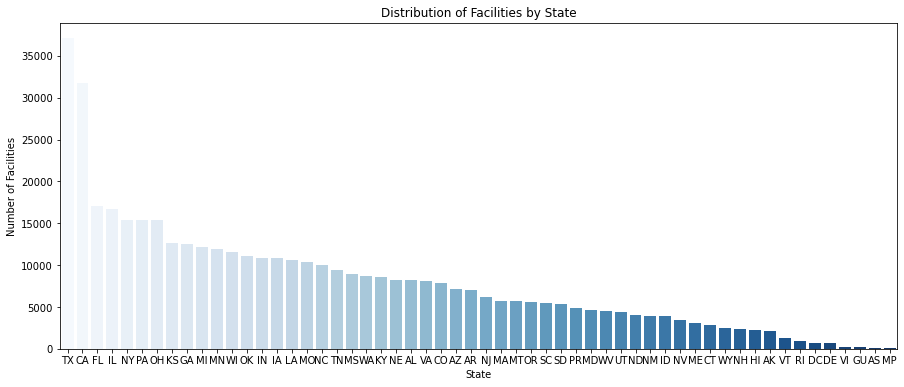

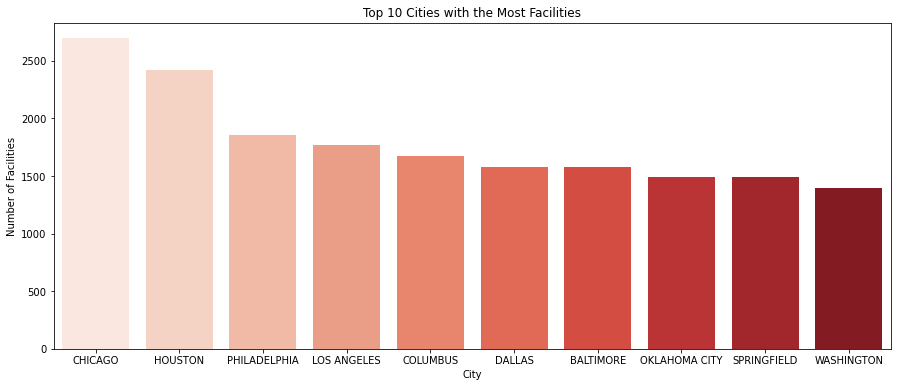

In [518]:

# Explore Geographic Data
state_distribution = df['State'].value_counts()
city_distribution = df['City'].value_counts()
county_distribution = df['County Name'].value_counts()

# Visualize Geographic Distribution

# State Distribution
plt.figure(figsize=(15, 6))
sns.barplot(x=state_distribution.index, y=state_distribution.values, palette='Blues')
plt.title('Distribution of Facilities by State')
plt.xlabel('State')
plt.ylabel('Number of Facilities')
plt.show()

# City Distribution
plt.figure(figsize=(15, 6))
sns.barplot(x=city_distribution[:10].index, y=city_distribution[:10].values, palette='Reds')
plt.title('Top 10 Cities with the Most Facilities')
plt.xlabel('City')
plt.ylabel('Number of Facilities')
plt.show()


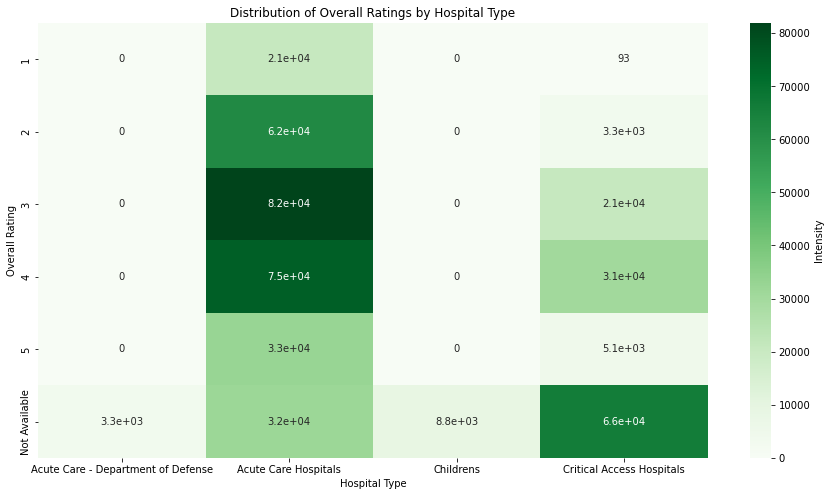

In [519]:
# find Hospital overall rating by Hospital type

# Create a pivot table for heatmap
heatmap_data = df.pivot_table(index='Hospital overall rating', columns='Hospital Type', aggfunc='size', fill_value=0)

# Plot heatmap with a cooler color palette
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='Greens', annot=True, cbar_kws={'label': 'Intensity'})
plt.title('Distribution of Overall Ratings by Hospital Type')
plt.xlabel('Hospital Type')
plt.ylabel('Overall Rating')
plt.show()

In [520]:
# find percentage of Acute Care Hospitals in the dataset
total_hospitals = len(top_rating_hospitals)
acute_care_hospitals = len(top_rating_hospitals[top_rating_hospitals['Hospital Type'] == 'Acute Care Hospitals'])

percentage_acute_care = (acute_care_hospitals / total_hospitals) * 100

print(f"Percentage of Acute Care Hospitals: {percentage_acute_care:.2f}%")


Percentage of Acute Care Hospitals: 90.62%


<i>*Acute Care Hospital: a hospital that provides inpatient medical care and other related services for surgery, 
acute medical conditions or injuries (usually for a short term illness or condition).<i>

In [522]:
import plotly.express as px
import pandas as pd

df['numeric_overall_rating'] = pd.to_numeric(df['Hospital overall rating'], errors='coerce')

# Grouping the DataFrame by State and calculating the mean overall rating
state_avg_rating = df.groupby('State')['numeric_overall_rating'].mean().reset_index()

# Plotting the choropleth map
fig = px.choropleth(
    state_avg_rating,
    locations='State',
    locationmode="USA-states",
    color='numeric_overall_rating',
    color_continuous_scale='viridis',
    scope="usa",
    title='Average Hospital Overall Ratings by State'
)

# Show the map
fig.show()


In [523]:
# sort hospitals by overall rating
top_rating_hospitals = (
    df.sort_values(by='numeric_overall_rating', ascending=False)
      .groupby('State')
      .head()
      .drop_duplicates(subset='Facility Name')
)

# Display the Top 10
top_rating_hospitals[['State', 'Facility Name', 'numeric_overall_rating']].head(10)

,State,Facility Name,numeric_overall_rating
400831,VA,NORTON COMMUNITY HOSPITAL,5.0
425751,WI,SAUK PRAIRIE HOSPITAL,5.0
33476,CA,SEQUOIA HOSPITAL,5.0
396319,UT,DIXIE REGIONAL MEDICAL CENTER,5.0
191103,MI,BEAUMONT HOSPITAL - GROSSE POINTE,5.0
260350,NM,NOR-LEA HOSPITAL DISTRICT,5.0
249403,NH,EXETER HOSPITAL INC,5.0
292838,OH,WAYNE HEALTHCARE,5.0
88628,GA,UNION GENERAL HOSPITAL,5.0
383346,TX,BAYLOR SCOTT & WHITE HEART & VASCULAR HOSPITAL...,5.0


In [524]:
# which type of rating is more reliable? Survey Rating or Overall Rating
total_rows = len(df)

# convert survey rating to numeric
df['numeric_survey_rating'] = pd.to_numeric(df['Patient Survey Star Rating'], errors='coerce')

# Calculate percentages
survey_percentage = (df['numeric_survey_rating'].count() / total_rows) * 100
overall_rating_percentage = (df['numeric_overall_rating'].count() / total_rows) * 100

# Print percentages
print("Percentage of non-NaN values in:")
print(f"- Patient Survey Star Rating: {survey_percentage:.2f}%")
print(f"- Hospital overall rating': {overall_rating_percentage:.2f}%")


Percentage of non-NaN values in:
- Patient Survey Star Rating: 8.35%
- Hospital overall rating': 75.14%


In [525]:
df['Meets criteria for promoting interoperability of EHRs'].unique()

array(['Y', nan], dtype=object)

In [526]:
# portion of hospitals meet EHR Criteria?
EHR_percentage = (df['Meets criteria for promoting interoperability of EHRs'].count() / total_rows) * 100

print(f"Percentage of facilities meets criteria for promoting interoperability of EHRs: {EHR_percentage:.2f}%")

Percentage of facilities meets criteria for promoting interoperability of EHRs: 83.15%


<i>*Electronic Health Record (EHR) is an electronic version of a patients medical history, that is maintained by the provider over time, and may include all of the key administrative clinical data relevant to that persons care under a particular provider, including demographics, progress notes, problems, medications, ...</i>

<AxesSubplot:xlabel='Emergency Services', ylabel='count'>

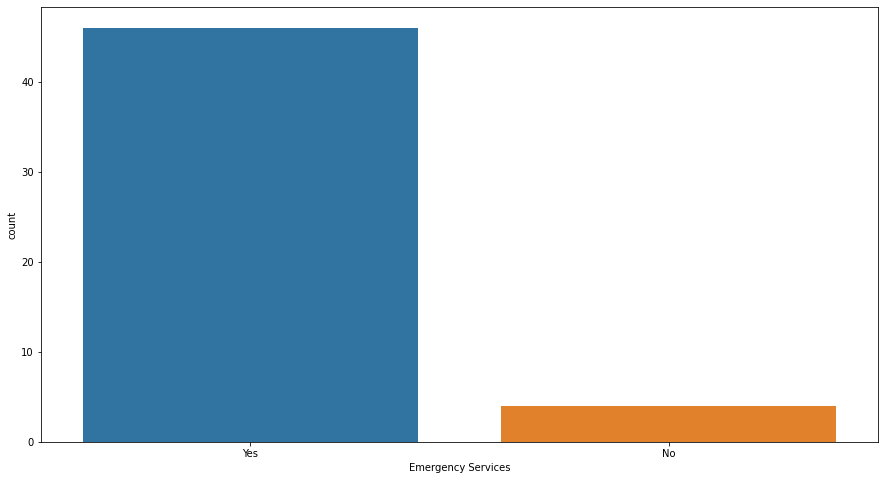

In [527]:
# emergency services in Top Rated Hospitals?
plt.figure(figsize=(15,8))
sns.countplot(x='Emergency Services',data=top_rating_hospitals.head(50))

In [528]:
df['Mortality national comparison'].unique()

array(['Below the national average', 'Same as the national average',
       'Not Available', 'Above the national average'], dtype=object)

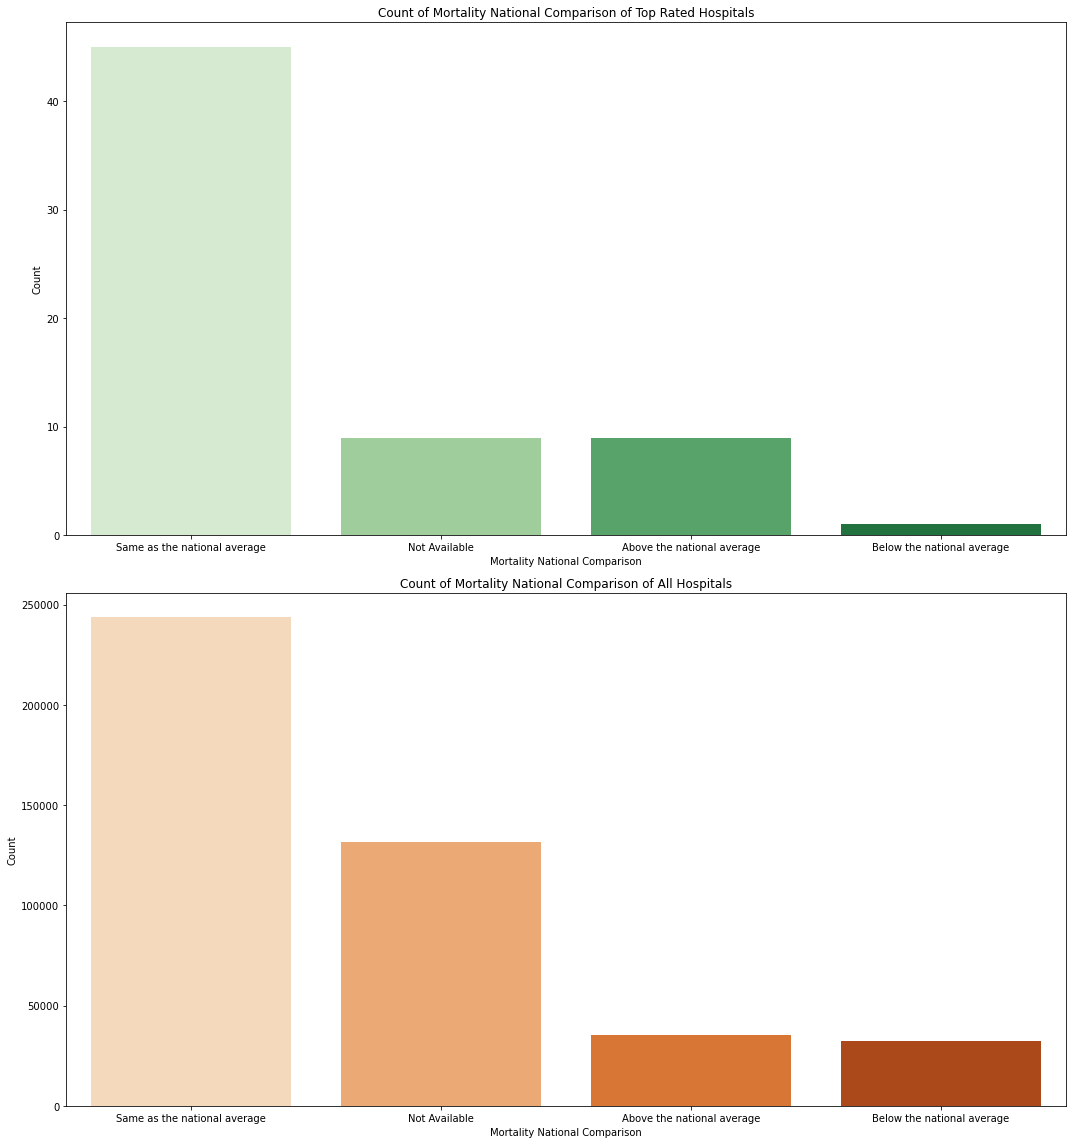

In [529]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mortality Rate of Top Rated Hospitals and All Hospitals
fig, axes = plt.subplots(nrows=2, figsize=(15, 16))

# First subplot (Top Rated Hospitals)
sns.countplot(
    data=top_hospitals_by_state.head(100),
    x='Mortality national comparison',
    order=df['Mortality national comparison'].value_counts().index,
    ax=axes[0],
    palette='Greens'  # Choose a color palette for the top-rated hospitals
)
axes[0].set_title('Count of Mortality National Comparison of Top Rated Hospitals')
axes[0].set_xlabel('Mortality National Comparison')
axes[0].set_ylabel('Count')

# Second subplot (All Hospitals)
sns.countplot(
    data=df,
    x='Mortality national comparison',
    order=df['Mortality national comparison'].value_counts().index,
    ax=axes[1],
    palette='Oranges'  # Choose a different color palette for all hospitals
)
axes[1].set_title('Count of Mortality National Comparison of All Hospitals')
axes[1].set_xlabel('Mortality National Comparison')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [530]:
# how many questions were asked?
df['HCAHPS Question'].nunique()

93

In [531]:
# see the HCAHPS Questions for Nurses, Doctors, Staffs, and Others and Answer Percentages

# Convert 'HCAHPS Answer Percent' column to numeric, coercing errors to NaN
df['HCAHPS Answer Percent'] = pd.to_numeric(df['HCAHPS Answer Percent'], errors='coerce')

average_answer_percentages = {'Nurses Questions': [], 'Doctors Questions': [], 'Staffs Questions': [], 'Other Questions': []}

# Iterate through each unique question
for question in df['HCAHPS Question'].unique():
    # Filter DataFrame for the specific question
    question_df = df[df['HCAHPS Question'] == question]
    
    # Calculate the average Answer Percentage for the question
    average_percentage = question_df['HCAHPS Answer Percent'].mean()
    
    # Categorize the question based on keywords
    if 'nurse' in question.lower():
        category = 'Nurses Questions'
    elif 'doctor' in question.lower():
        category = 'Doctors Questions'
    elif 'staff' in question.lower():
        category = 'Staffs Questions'
    else:
        category = 'Other Questions'
    
    # Store the result in the corresponding category
    average_answer_percentages[category].append((question, average_percentage))

# Display the average Answer Percentages for each category
for category, questions in average_answer_percentages.items():
    print(f"{category}:\n")
    for question, avg_percentage in questions:
        print(f"Question: {question}, Average Answer Percentage: {avg_percentage:.2f}%\n")


Nurses Questions:

Question: Patients who reported that their nurses "Always" communicated well, Average Answer Percentage: 80.67%

Question: Patients who reported that their nurses "Sometimes" or "Never" communicated well, Average Answer Percentage: 4.11%

Question: Patients who reported that their nurses "Usually" communicated well, Average Answer Percentage: 15.22%

Question: Nurse communication - linear mean score, Average Answer Percentage: nan%

Question: Nurse communication - star rating, Average Answer Percentage: nan%

Question: Patients who reported that their nurses "Always" treated them with courtesy and respect, Average Answer Percentage: 86.82%

Question: Patients who reported that their nurses "Sometimes" or "Never"  treated them with courtesy and respect, Average Answer Percentage: 2.92%

Question: Patients who reported that their nurses "Usually"  treated them with courtesy and respect, Average Answer Percentage: 10.26%

Question: Patients who reported that their nurse

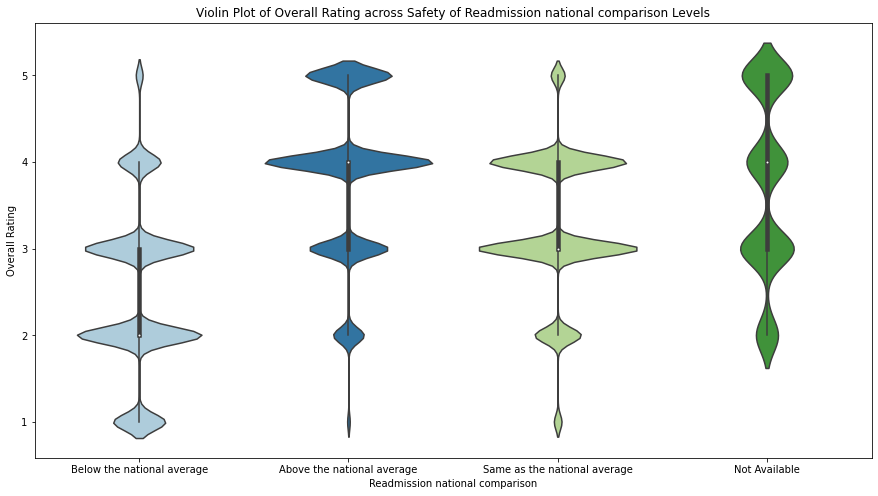

In [532]:
# Readmission
plt.figure(figsize=(15, 8))
sns.violinplot(x='Readmission national comparison', y='numeric_overall_rating', data=df, palette='Paired')
plt.title('Violin Plot of Overall Rating across Safety of Readmission national comparison Levels')
plt.xlabel('Readmission national comparison')
plt.ylabel('Overall Rating')
plt.show()


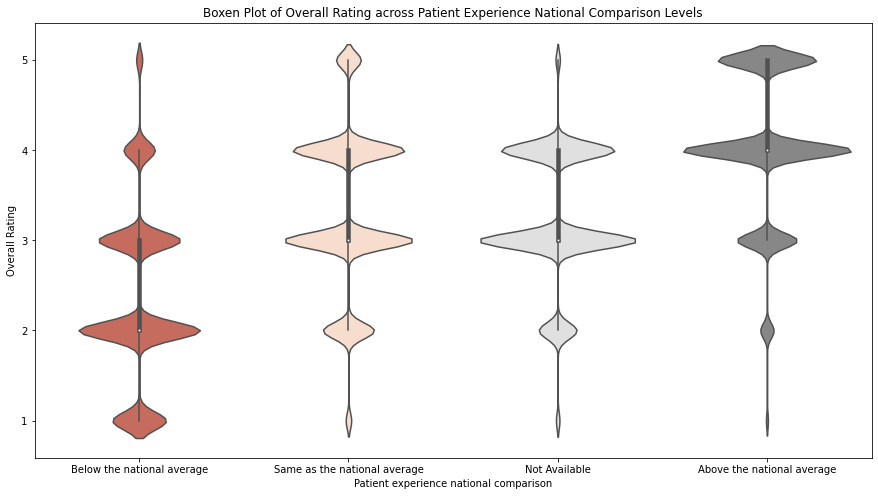

In [533]:
# patient experience
plt.figure(figsize=(15, 8))
sns.violinplot(x='Patient experience national comparison', y='numeric_overall_rating', data=df, palette='RdGy')
plt.title('Boxen Plot of Overall Rating across Patient Experience National Comparison Levels')
plt.xlabel('Patient experience national comparison')
plt.ylabel('Overall Rating')
plt.show()


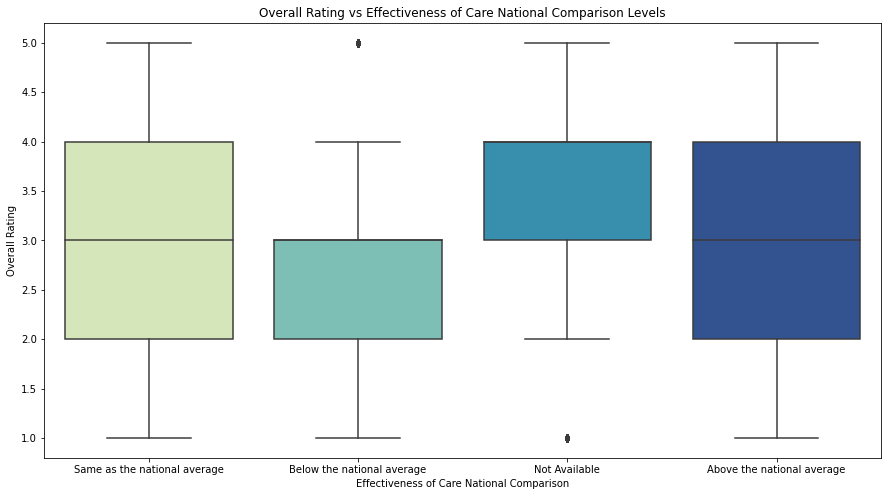

In [534]:
# effectiveness of care
plt.figure(figsize=(15, 8))
sns.boxplot(x='Effectiveness of care national comparison', y='numeric_overall_rating', data=df, palette='YlGnBu')
plt.title('Overall Rating vs Effectiveness of Care National Comparison Levels')
plt.xlabel('Effectiveness of Care National Comparison')
plt.ylabel('Overall Rating')
plt.show()

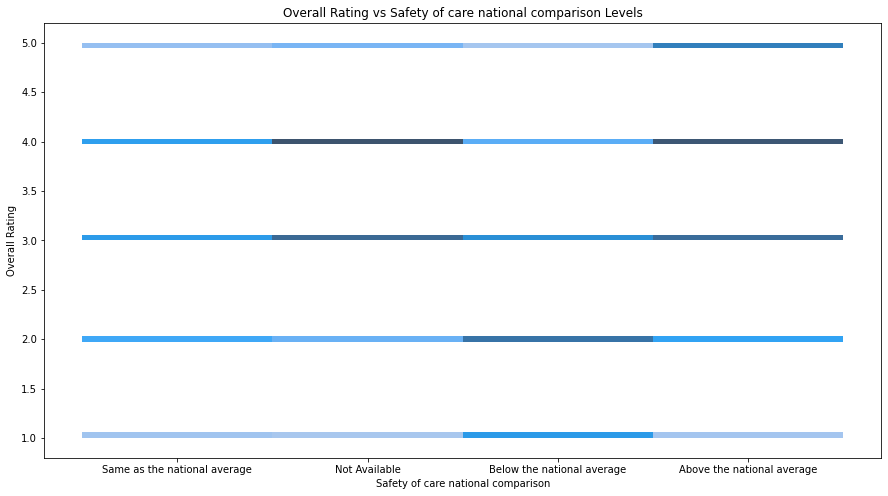

In [535]:
# safety of care
plt.figure(figsize=(15, 8))
sns.histplot(x='Safety of care national comparison', y='numeric_overall_rating', data=df, palette='YlGnBu')
plt.title('Overall Rating vs Safety of care national comparison Levels')
plt.xlabel('Safety of care national comparison')
plt.ylabel('Overall Rating')
plt.show()

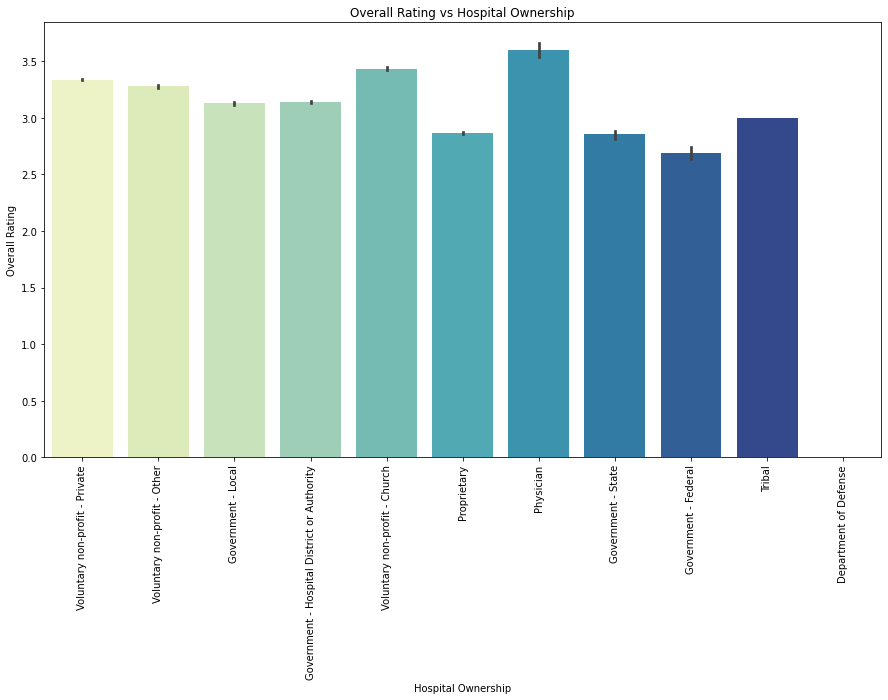

In [536]:
# does Ownership matter?

# Sort the DataFrame by 'numeric_overall_rating'
df_sorted = df.sort_values(by='numeric_overall_rating', ascending=False)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Hospital Ownership', y='numeric_overall_rating', data=df_sorted, palette='YlGnBu')
plt.title('Overall Rating vs Hospital Ownership')
plt.xlabel('Hospital Ownership')
plt.ylabel('Overall Rating')

# Rotate x-axis labels to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()


<h1>4. Statistical Analysis:</h1>

In [537]:
# which features drive Hospital Overall Rating most? (base on Chi-squared Test)
from scipy.stats import chi2_contingency

# Select the columns of interest
columns_of_interest = [
    'Hospital Type',
    'Hospital Ownership',
    'Emergency Services',
    'Meets criteria for promoting interoperability of EHRs',
    'Mortality national comparison',
    'Safety of care national comparison',
    'Readmission national comparison',
    'Patient experience national comparison',
    'Effectiveness of care national comparison',
    'Timeliness of care national comparison',
    'Efficient use of medical imaging national comparison',
    'Hospital overall rating'
]

# Create a subset DataFrame with only the selected columns
subset_df = df[columns_of_interest]

# Create a list to store results
chi_square_results = []

# Iterate through each column for chi-square tests
for column in columns_of_interest[:-1]:  # Exclude 'Hospital overall rating'
    contingency_table = pd.crosstab(subset_df[column], subset_df['Hospital overall rating'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Determine the decision based on the p-value (using a common threshold of 0.05)
    if p < 0.05:
        decision = 'Reject the null hypothesis'
    else:
        decision = 'Fail to reject the null hypothesis'
    
    chi_square_results.append({
        'Column': column,
        'Chi2 Value': chi2,
        'P-value': p,
        'Decision': decision
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(chi_square_results)

# Sort the DataFrame by Chi2 values in descending order
results_df_sorted = results_df.sort_values(by='Chi2 Value', ascending=False)

# Display the sorted results
print(results_df_sorted)


                                               Column     Chi2 Value  P-value  \
6                     Readmission national comparison  471681.192282      0.0   
7              Patient experience national comparison  415215.164084      0.0   
4                       Mortality national comparison  344765.604863      0.0   
5                  Safety of care national comparison  288570.015102      0.0   
8           Effectiveness of care national comparison  250867.253926      0.0   
9              Timeliness of care national comparison  235272.173110      0.0   
10  Efficient use of medical imaging national comp...  206878.236487      0.0   
0                                       Hospital Type  137049.408055      0.0   
1                                  Hospital Ownership   52808.365612      0.0   
2                                  Emergency Services   25917.652662      0.0   
3   Meets criteria for promoting interoperability ...       0.000000      1.0   

                           

<h1>5. Results and Interpretation:</h1>

- From the analysis, the Top Rated Hospitals most likely are Acute Care Hospitals and located in Western states such as Utah, Colorado, Idaho and South Dakota. 
- Also their Readmission, Patient experience, Effective of care, Safety of care, Effectiveness of care, Timeliness of care rates are equal to or higher than national rate, and their Motality rate is lower.

<h1>6. Recommendations:</h1>

- If high patients satisfaction was the goal of the business, then it better be an Acute Care hospital and located in such states as Utah and Colorado.

- The top priorities for patients satisfaction improvement are readmission, patient experience, effective of care rate. 

<h1>7. Limitations and Assumptions:</h1>

- The data is not current (year 2020).

- Assume the Hospital overall rating was reliable.

- Different Hospital Types may have different types of patients so the ratings might not have equal meanings.

- More geographic data needed to really understand why hospitals in some states have higher ratings.

- The Readmission Rate is a curious one because, though it is strongly bond with high overall rating, it may also implies that quality of works were not good.